Your Name: Kieran Fitzmaurice

Consider a sphere released from rest above earth's surface. Acting on the sphere are three forces:
1. The gravitational force:
$$F_g=\tfrac43\pi R^3 \rho_s g\,,$$
where $\rho_s$ is density of the sphere, $R$ is the radius of the sphere, and $g=9.8$ m/s$^2$. This force is always directed downwards.
2. The buoyant force:
$$F_b=\tfrac43\pi R^3\rho_a g\,,$$
where $\rho_a=1.225$ kg/m$^3$ is the density of air. This force is always directed upwards.
3. The drag force:
$$F_d=\tfrac12\pi R^2 \rho_aC_d v^2\,,$$
where $v$ is the speed of the sphere, and $C_d=0.5$ is the drag coefficient of the sphere. This force always points in the opposite direction of the sphere's velocity.

Putting these together, we have
$$\tfrac43\pi R^3\rho_s\frac{d^2x}{dt^2}=Fb-Fg\pm Fd\,,$$
where the term on the left is the net force.

- Rewrite this second order equation as two first order equations.


- Plot the velocity of a water balloon ($\rho_s=1000$ kg/m$^3$) with radius 20 cm from $t=0$ to $t=60$ s. Verify that it reaches the correct terminal velocity.

> Hint: You can calculate the terminal velocity analytically by setting $d^2x/dt^2=0$.

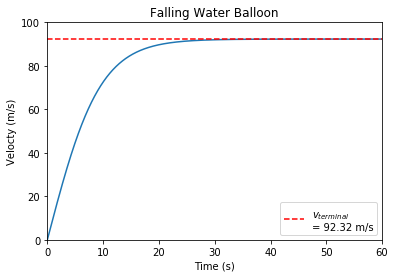

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.optimize import newton, fmin
from scipy.integrate import odeint

Fg = lambda R,p_s,g: (4/3)*np.pi*R**3*p_s*g
Fb = lambda R,p_a,g: (4/3)*np.pi*R**3*p_a*g
Fd = lambda R,p_a,C_d,v: (1/2)*np.pi*R**2*p_a*C_d*v**2

def RK4_step(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f(r,t):
    x,v = r
    
    if v > 0: #going up
        Fnet = Fb(R,p_a,g) - Fg(R,p_s,g) - Fd(R,p_a,C_d,v)
    else: #coming down
        Fnet = Fb(R,p_a,g) - Fg(R,p_s,g) + Fd(R,p_a,C_d,v)
        
    fx = v
    fv = Fnet/(4/3*np.pi*R**3*p_s)
    return np.array([fx,fv])

g = 9.8 # acceleration due to gravity (m/s^2)
p_a = 1.225 # density of air (kg/m^3)
p_s = 1000 # density of water balloon (kg/m^3)
C_d = 0.5 # drag coefficient
R = 0.2 # m

#Initial Conditions
x = 0
v = 0
h = 0.001

t_values = np.arange(0,60,h)
x_values = []
v_values = []

for t in t_values:
    x_values.append(x)
    v_values.append(v)
    r = (x,v)
    x,v = RK4_step(f,r,t,h)
    
    
v_terminal = (abs((Fg(R,p_s,g) - Fb(R,p_a,g))/((1/2)*np.pi*R**2*p_a*C_d)))**0.5
    
plt.plot(t_values,abs(np.array(v_values)))
plt.plot([min(t_values),max(t_values)],[v_terminal,v_terminal],'r--',label = "$v_{terminal}$\n= %.2lf m/s" % v_terminal)
plt.axis(xmin = 0,ymin = 0, xmax = 60, ymax = 100)
plt.xlabel("Time (s)")
plt.ylabel("Velocty (m/s)")
plt.title("Falling Water Balloon")
plt.legend()
plt.show()

- Plot the velocity of a helium balloon ($\rho_s=0.164$ kg/m$^3$) with radius 20 cm from $t=0$ until it reaches terminal velocity. Verify that it reaches the correct terminal velocity.


- Calculate the amount of time it took for the helium balloon to reach 99% of its terminal velocity.

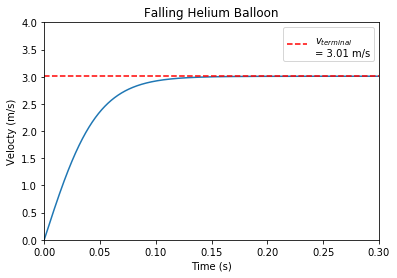

In [2]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.optimize import newton, fmin
from scipy.integrate import odeint

Fg = lambda R,p_s,g: (4/3)*np.pi*R**3*p_s*g
Fb = lambda R,p_a,g: (4/3)*np.pi*R**3*p_a*g
Fd = lambda R,p_a,C_d,v: (1/2)*np.pi*R**2*p_a*C_d*v**2

def f(r,t):
    x,v = r
    
    if v > 0: #going up
        Fnet = Fb(R,p_a,g) - Fg(R,p_s,g) - Fd(R,p_a,C_d,v)
    else: #coming down
        Fnet = Fb(R,p_a,g) - Fg(R,p_s,g) + Fd(R,p_a,C_d,v)
        
    fx = v
    fv = Fnet/(4/3*np.pi*R**3*p_s)
    return np.array([fx,fv])

g = 9.8 # acceleration due to gravity (m/s^2)
p_a = 1.225 # density of air (kg/m^3)
p_s = 0.164 # density of helium balloon (kg/m^3)
C_d = 0.5 # drag coefficient
R = 0.2 # m

#Initial Conditions
x0 = 0
v0 = 0

t = np.linspace(0,0.3,5000)

r = odeint(f,(x0,v0),t)
x,v = r.T
    
v_terminal = abs(((Fg(R,p_s,g) - Fb(R,p_a,g))/((1/2)*np.pi*R**2*p_a*C_d)))**0.5

plt.plot(t,abs(np.array(v)))
plt.plot([min(t),max(t)],[v_terminal,v_terminal],'r--',label = "$v_{terminal}$\n= %.2lf m/s" % v_terminal)
plt.axis(xmin = 0,ymin = 0, xmax = 0.3, ymax = 4)
plt.xlabel("Time (s)")
plt.ylabel("Velocty (m/s)")
plt.title("Falling Helium Balloon")
plt.legend()
plt.show()

In [3]:
@np.vectorize
def func(tf):
    r = odeint(f, (x0, v0), (0,tf))
    x, v = r.T
    return(abs(v[-1]) - 0.99*v_terminal)

guess = 0.15
tf = newton(func,guess)
print("0.99 Terminal Velocity at %.4lf seconds" % tf)

0.99 Terminal Velocity at 0.1256 seconds


- Make a 2-D plot using `imshow` that shows the time taken to reach 99% of terminal velocity for low-density objects. Specifically, use $0.8<\rho_s<1.6$ kg/m$^3$ and $1<R<100$ cm$^3$.

> Hint 1: You can pass `aspect="auto"` to `imshow` have it auto-scale both axes. You'll still need to use `extent` to control the values shown.

> Hint 2: Start with a coarse grid of values for $\rho_s$ and $R$ while testing.

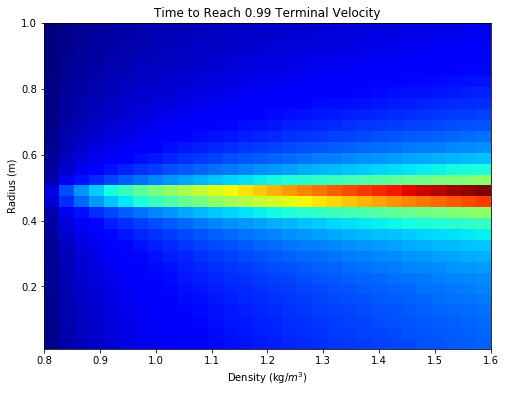

In [6]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.optimize import newton, fmin
from scipy.integrate import odeint

Fg = lambda R,p_s,g: (4/3)*np.pi*R**3*p_s*g
Fb = lambda R,p_a,g: (4/3)*np.pi*R**3*p_a*g
Fd = lambda R,p_a,C_d,v: (1/2)*np.pi*R**2*p_a*C_d*v**2

def f(r,t):
    x,v = r
    
    if v > 0: #going up
        Fnet = Fb(R,p_a,g) - Fg(R,p_s,g) - Fd(R,p_a,C_d,v)
    else: #coming down
        Fnet = Fb(R,p_a,g) - Fg(R,p_s,g) + Fd(R,p_a,C_d,v)
        
    fx = v
    fv = Fnet/(4/3*np.pi*R**3*p_s)
    return np.array([fx,fv])

@np.vectorize
def func(tf):
    r = odeint(f, (x0, v0), (0,tf))
    x, v = r.T
    return(abs(v[-1]) - 0.99*v_terminal)

n = 30

g = 9.8 # acceleration due to gravity (m/s^2)
p_a = 1.225 # density of air (kg/m^3)
C_d = 0.5 # drag coefficient
ps_values = np.linspace(0.8,1.6,n) # density (kg/m^3)
R_values = np.linspace(0.01,1,n) # radius (m)

#Initial Conditions
x0 = 0
v0 = 0

grid = np.zeros((n,n))

for i,p_s in enumerate(ps_values):
    for j,R in enumerate(R_values):
        v_terminal = abs(((Fg(R,p_s,g) - Fb(R,p_a,g))/((1/2)*np.pi*R**2*p_a*C_d)))**0.5
        guess = 0.001
        tf = newton(func,guess)
        grid[i][j] = tf
        
fig = plt.figure(figsize = (8,6))
plt.imshow(grid,cmap = "jet",extent=[0.8,1.6,0.01,1],aspect = "auto")
plt.xlabel("Density (kg/$m^3$)")
plt.ylabel("Radius (m)")
plt.title("Time to Reach 0.99 Terminal Velocity")
plt.show()